# **Data understanding**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Upload dataset called 'trainSantander.csv'
dataset = pd.read_csv('trainSantander.csv')

In [5]:
#Check how many datas we have
dataset.shape

(200000, 202)

In [6]:
dataset.head()

ID_code  target    var_0   var_1  ...  var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863  ...   7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473  ...   8.1267   8.7889  18.3560   1.9518
2  train_2       0   8.6093 -2.7457  ...  -6.5213   8.2675  14.7222   0.3965
3  train_3       0  11.0604 -2.1518  ...  -2.9275  10.2922  17.9697  -8.9996
4  train_4       0   9.8369 -1.4834  ...   3.9267   9.5031  17.9974  -8.8104

[5 rows x 202 columns]

In [7]:
dataset.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [8]:
#Verify types of eache column
def datasetTypes(dataset):
  col = 0
  for colName, typ in dataset.dtypes.items():
      #if(typ == "int64"):
      print(f"Column: {colName}, Type : {typ}, # : {col}")
      col = col + 1

In [9]:
def convert_types(df):
    # Convert data types to reduce memory
    for c in df:
        col_type = str(df[c].dtypes)
        numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        
        # Convert objects to category
        if col_type == 'object':
            df[c] = df[c].astype('category')
        
        # numerics
        elif col_type in numerics:
            c_min = df[c].min()
            c_max = df[c].max()
            if col_type[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[c] = df[c].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[c] = df[c].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[c] = df[c].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[c] = df[c].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[c] = df[c].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[c] = df[c].astype(np.float32)
                else:
                    df[c] = df[c].astype(np.float64)  
        
    return df

In [10]:
#Converts columns types to best types for reducing memory usage
newDataset = convert_types(dataset)
newDataset.dtypes

ID_code    category
target         int8
var_0       float16
var_1       float16
var_2       float16
             ...   
var_195     float16
var_196     float16
var_197     float16
var_198     float16
var_199     float16
Length: 202, dtype: object

In [11]:
newDataset.memory_usage(deep=True)

Index           128
ID_code    19731770
target       200000
var_0        400000
var_1        400000
             ...   
var_195      400000
var_196      400000
var_197      400000
var_198      400000
var_199      400000
Length: 203, dtype: int64

In [12]:
newDataset['target'] = newDataset['target'].astype('category')

In [13]:
datasetTypes(newDataset)

Column: ID_code, Type : category, # : 0
Column: target, Type : category, # : 1
Column: var_0, Type : float16, # : 2
Column: var_1, Type : float16, # : 3
Column: var_2, Type : float16, # : 4
Column: var_3, Type : float16, # : 5
Column: var_4, Type : float16, # : 6
Column: var_5, Type : float16, # : 7
Column: var_6, Type : float16, # : 8
Column: var_7, Type : float16, # : 9
Column: var_8, Type : float16, # : 10
Column: var_9, Type : float16, # : 11
Column: var_10, Type : float16, # : 12
Column: var_11, Type : float16, # : 13
Column: var_12, Type : float16, # : 14
Column: var_13, Type : float16, # : 15
Column: var_14, Type : float16, # : 16
Column: var_15, Type : float16, # : 17
Column: var_16, Type : float16, # : 18
Column: var_17, Type : float16, # : 19
Column: var_18, Type : float16, # : 20
Column: var_19, Type : float16, # : 21
Column: var_20, Type : float16, # : 22
Column: var_21, Type : float16, # : 23
Column: var_22, Type : float16, # : 24
Column: var_23, Type : float16, # : 25
Col

In [14]:
newDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: category(2), float16(200)
memory usage: 83.8 MB


In [15]:
newDataset.describe(include='all')

ID_code    target  ...        var_198        var_199
count        200000  200000.0  ...  200000.000000  200000.000000
unique       200000       2.0  ...            NaN            NaN
top     train_99999       0.0  ...            NaN            NaN
freq              1  179902.0  ...            NaN            NaN
mean            NaN       NaN  ...            NaN            NaN
std             NaN       NaN  ...       0.000000       0.000000
min             NaN       NaN  ...       6.300781     -38.843750
25%             NaN       NaN  ...      13.828125     -11.210938
50%             NaN       NaN  ...      15.937500      -2.820312
75%             NaN       NaN  ...      18.062500       4.835938
max             NaN       NaN  ...      26.078125      28.500000

[11 rows x 202 columns]

# **Missing data**

In [16]:
def missingValuesPercentage(dataset):
  #Count of missing values
  missingCount = dataset.isnull().sum() 
  #Count of all values 
  valueCount = dataset.isnull().count() 
  #Percentage of missing values
  missingPercentage = round(missingCount / valueCount * 100,2) 
  #Dataframe with missing values
  #missingDf = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) 
  #print(missingDf)
  return missingPercentage

In [17]:
def SortedMissingDataPercentage (SortMissingPercentage):
    for colName, miss in SortMissingPercentage.items():
        print(f"Column: {colName}, Missing data: {miss}%")

In [18]:
#Calculate the new missing data percentage
missingPercentageV1 = missingValuesPercentage(newDataset)
#Sort missing percentage serie
SortMissingPercentageV1 = missingPercentageV1.sort_values(ascending=False)

In [19]:
SortedMissingDataPercentage(SortMissingPercentageV1)

Column: var_199, Missing data: 0.0%
Column: var_61, Missing data: 0.0%
Column: var_71, Missing data: 0.0%
Column: var_70, Missing data: 0.0%
Column: var_69, Missing data: 0.0%
Column: var_68, Missing data: 0.0%
Column: var_67, Missing data: 0.0%
Column: var_66, Missing data: 0.0%
Column: var_65, Missing data: 0.0%
Column: var_64, Missing data: 0.0%
Column: var_63, Missing data: 0.0%
Column: var_62, Missing data: 0.0%
Column: var_60, Missing data: 0.0%
Column: var_48, Missing data: 0.0%
Column: var_59, Missing data: 0.0%
Column: var_58, Missing data: 0.0%
Column: var_57, Missing data: 0.0%
Column: var_56, Missing data: 0.0%
Column: var_55, Missing data: 0.0%
Column: var_54, Missing data: 0.0%
Column: var_53, Missing data: 0.0%
Column: var_52, Missing data: 0.0%
Column: var_51, Missing data: 0.0%
Column: var_50, Missing data: 0.0%
Column: var_72, Missing data: 0.0%
Column: var_73, Missing data: 0.0%
Column: var_74, Missing data: 0.0%
Column: var_75, Missing data: 0.0%
Column: var_96, Mis

**Conclusion:** The dataset doesn´t have mising data

# Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt 

for column in newDataset:
  plt.figure(column)
  plt.title(column)
  if column == 'ID_code' or column == 'target':
    #show only the top 10 value count in each categorical data
    newDataset['target'].value_counts()[:10].plot(kind = 'bar')
  else:
    newDataset[column].plot(kind = 'hist')



**Conclusion:** Variables between 0 and 199 have Normal distribution and target variable is unbalanced with a higher frequency for the value 0

# Multivariate Analysis 

In [21]:
def boxPlot(newDataset):
    target = newDataset['target']
    for column in newDataset:
        if column != 'ID_code' and column != 'target':
            plt.figure(figsize=(7,7))
            plt.title('target vs '+ column)
            sns.boxplot(x = target, y = newDataset[column], data = newDataset, palette = "GnBu")

In [ ]:
import seaborn as sns

target = newDataset['target']

for column in newDataset:
  if column != 'ID_code' and column != 'target':
    plt.figure(figsize=(7,7))
    plt.title('target vs '+ column)
    sns.boxplot(x = target, y = newDataset[column], data = newDataset, palette = "GnBu")
    #sns.relplot(data=newDataset, x=target, y=column,hue=target)
    #plt.scatter(target,newDataset[column])
#sns.pairplot(newDataset, hue_order=target)

In [23]:
#Correlation matrix
correlation = newDataset.corr()

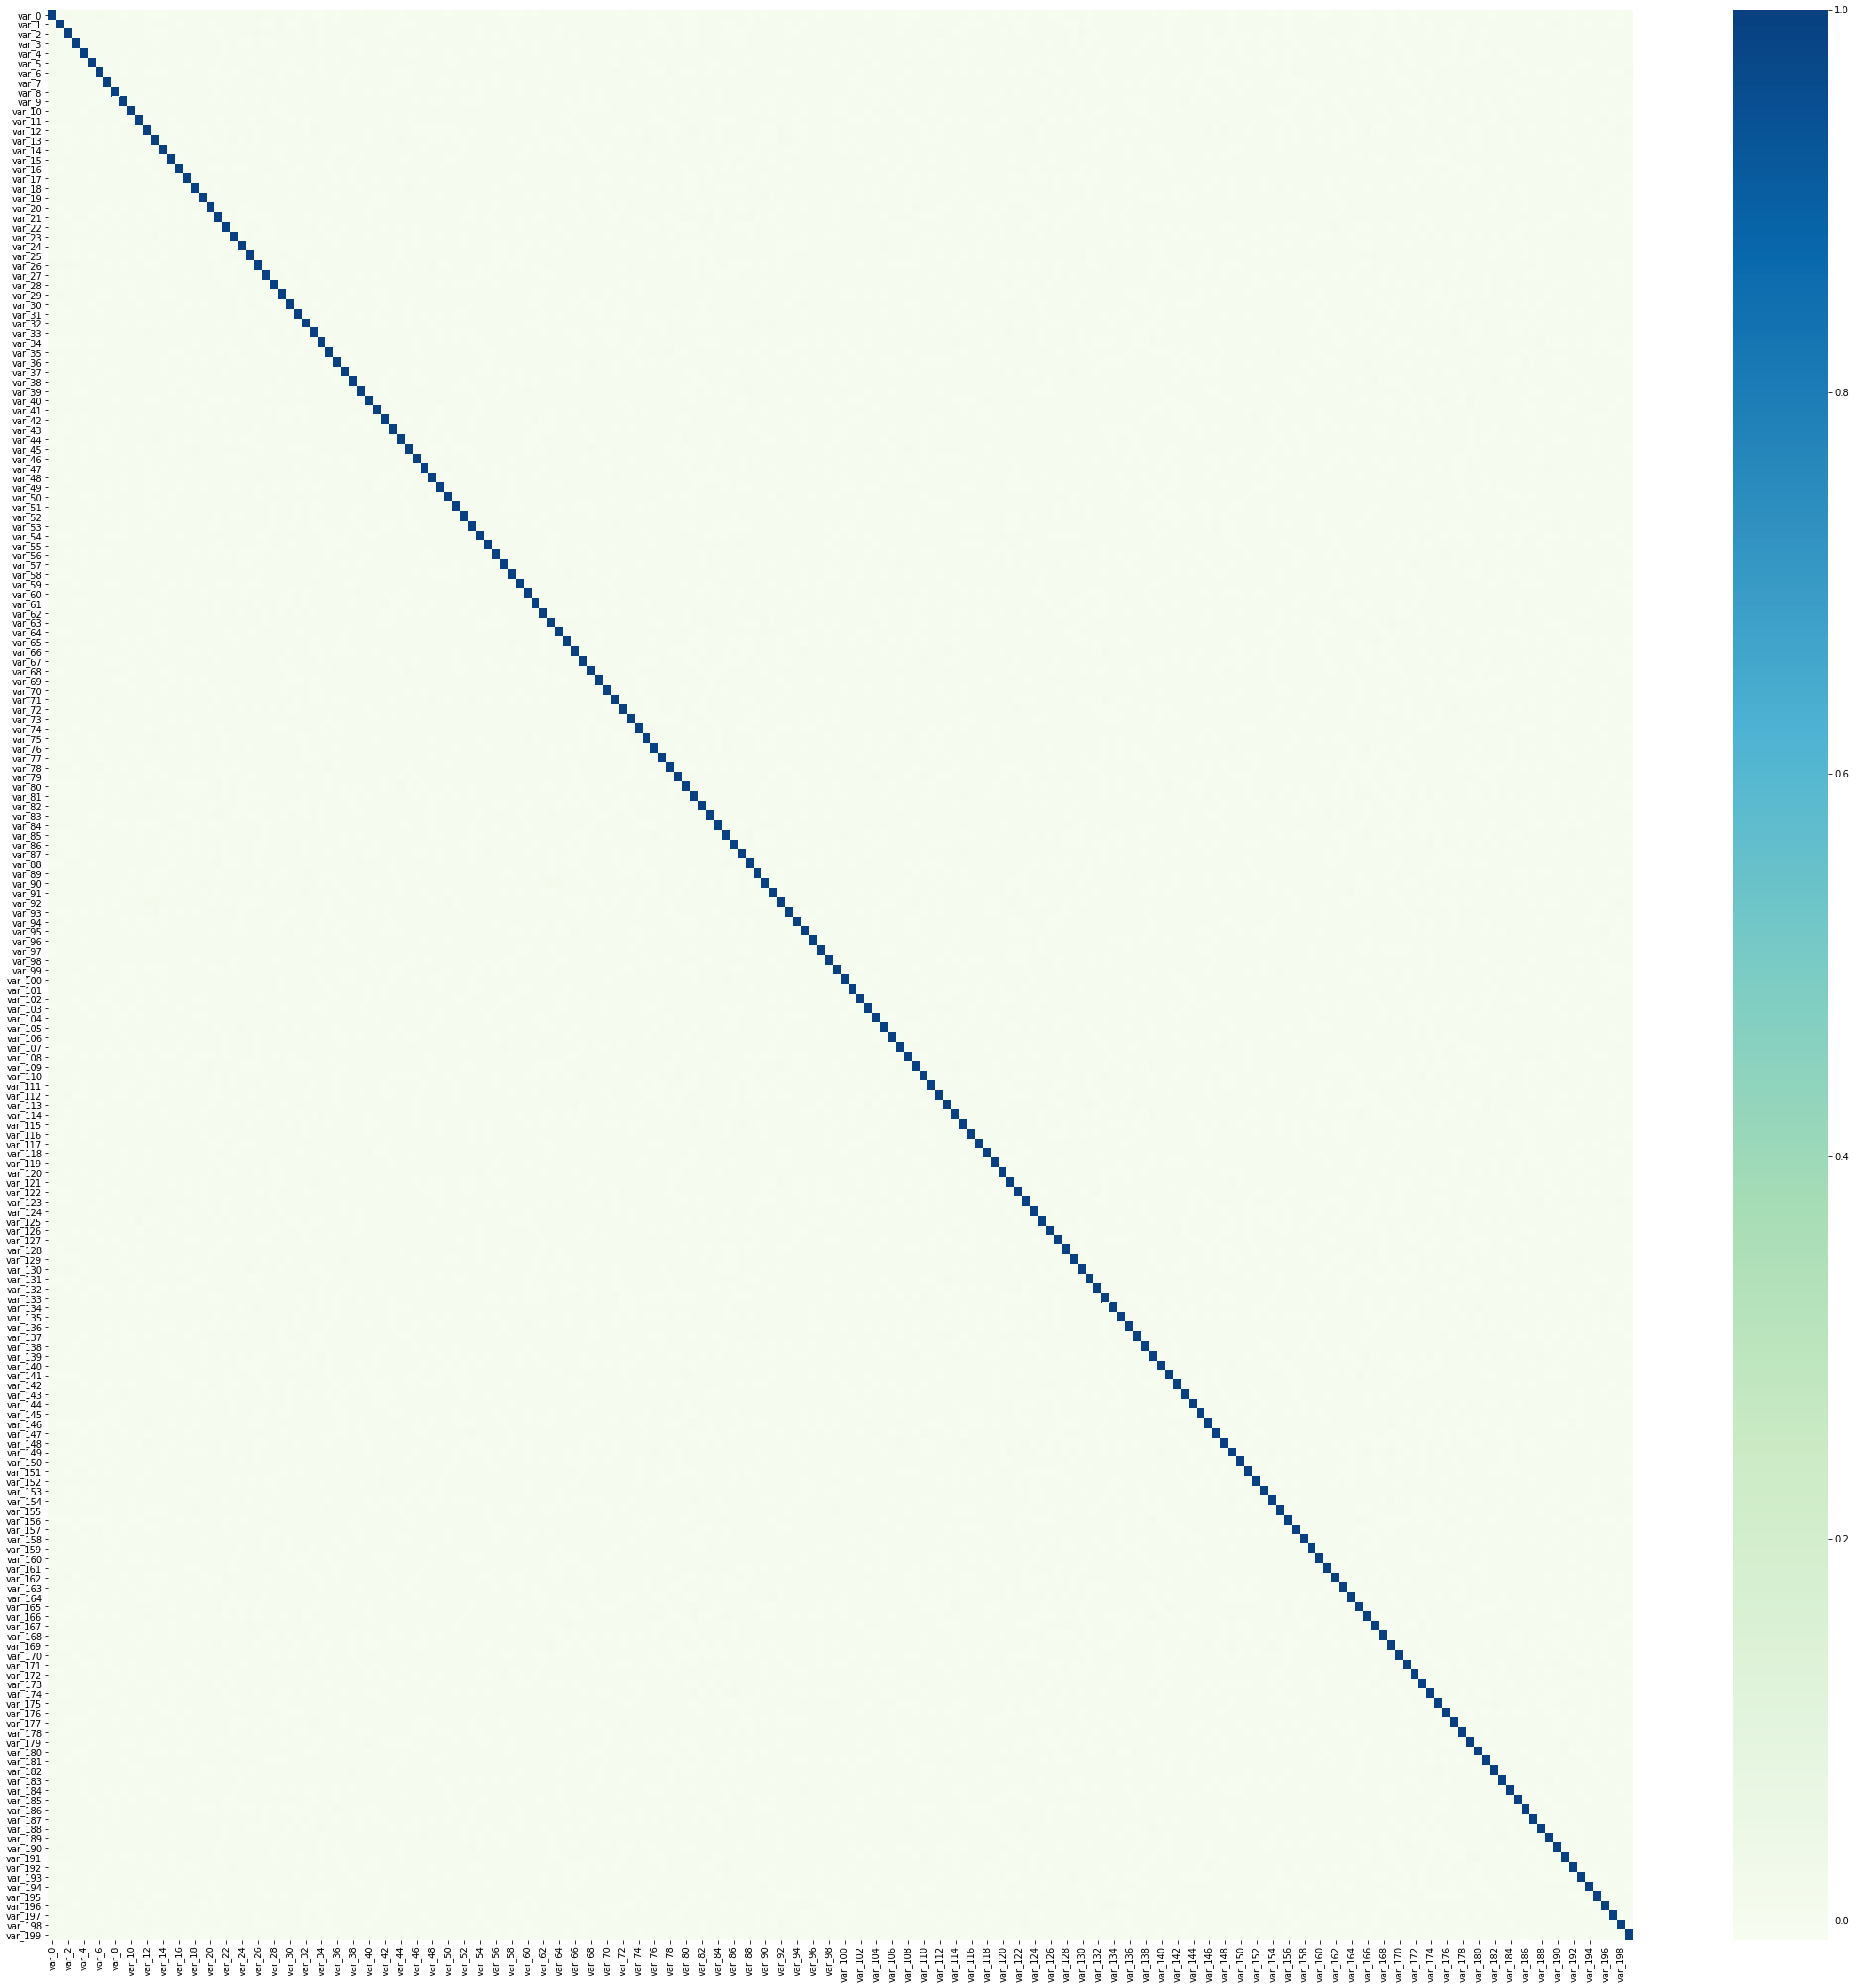

In [24]:
plt.figure(figsize=(40,40))
sns.heatmap(correlation, cmap = "GnBu", annot = False)
plt.show()

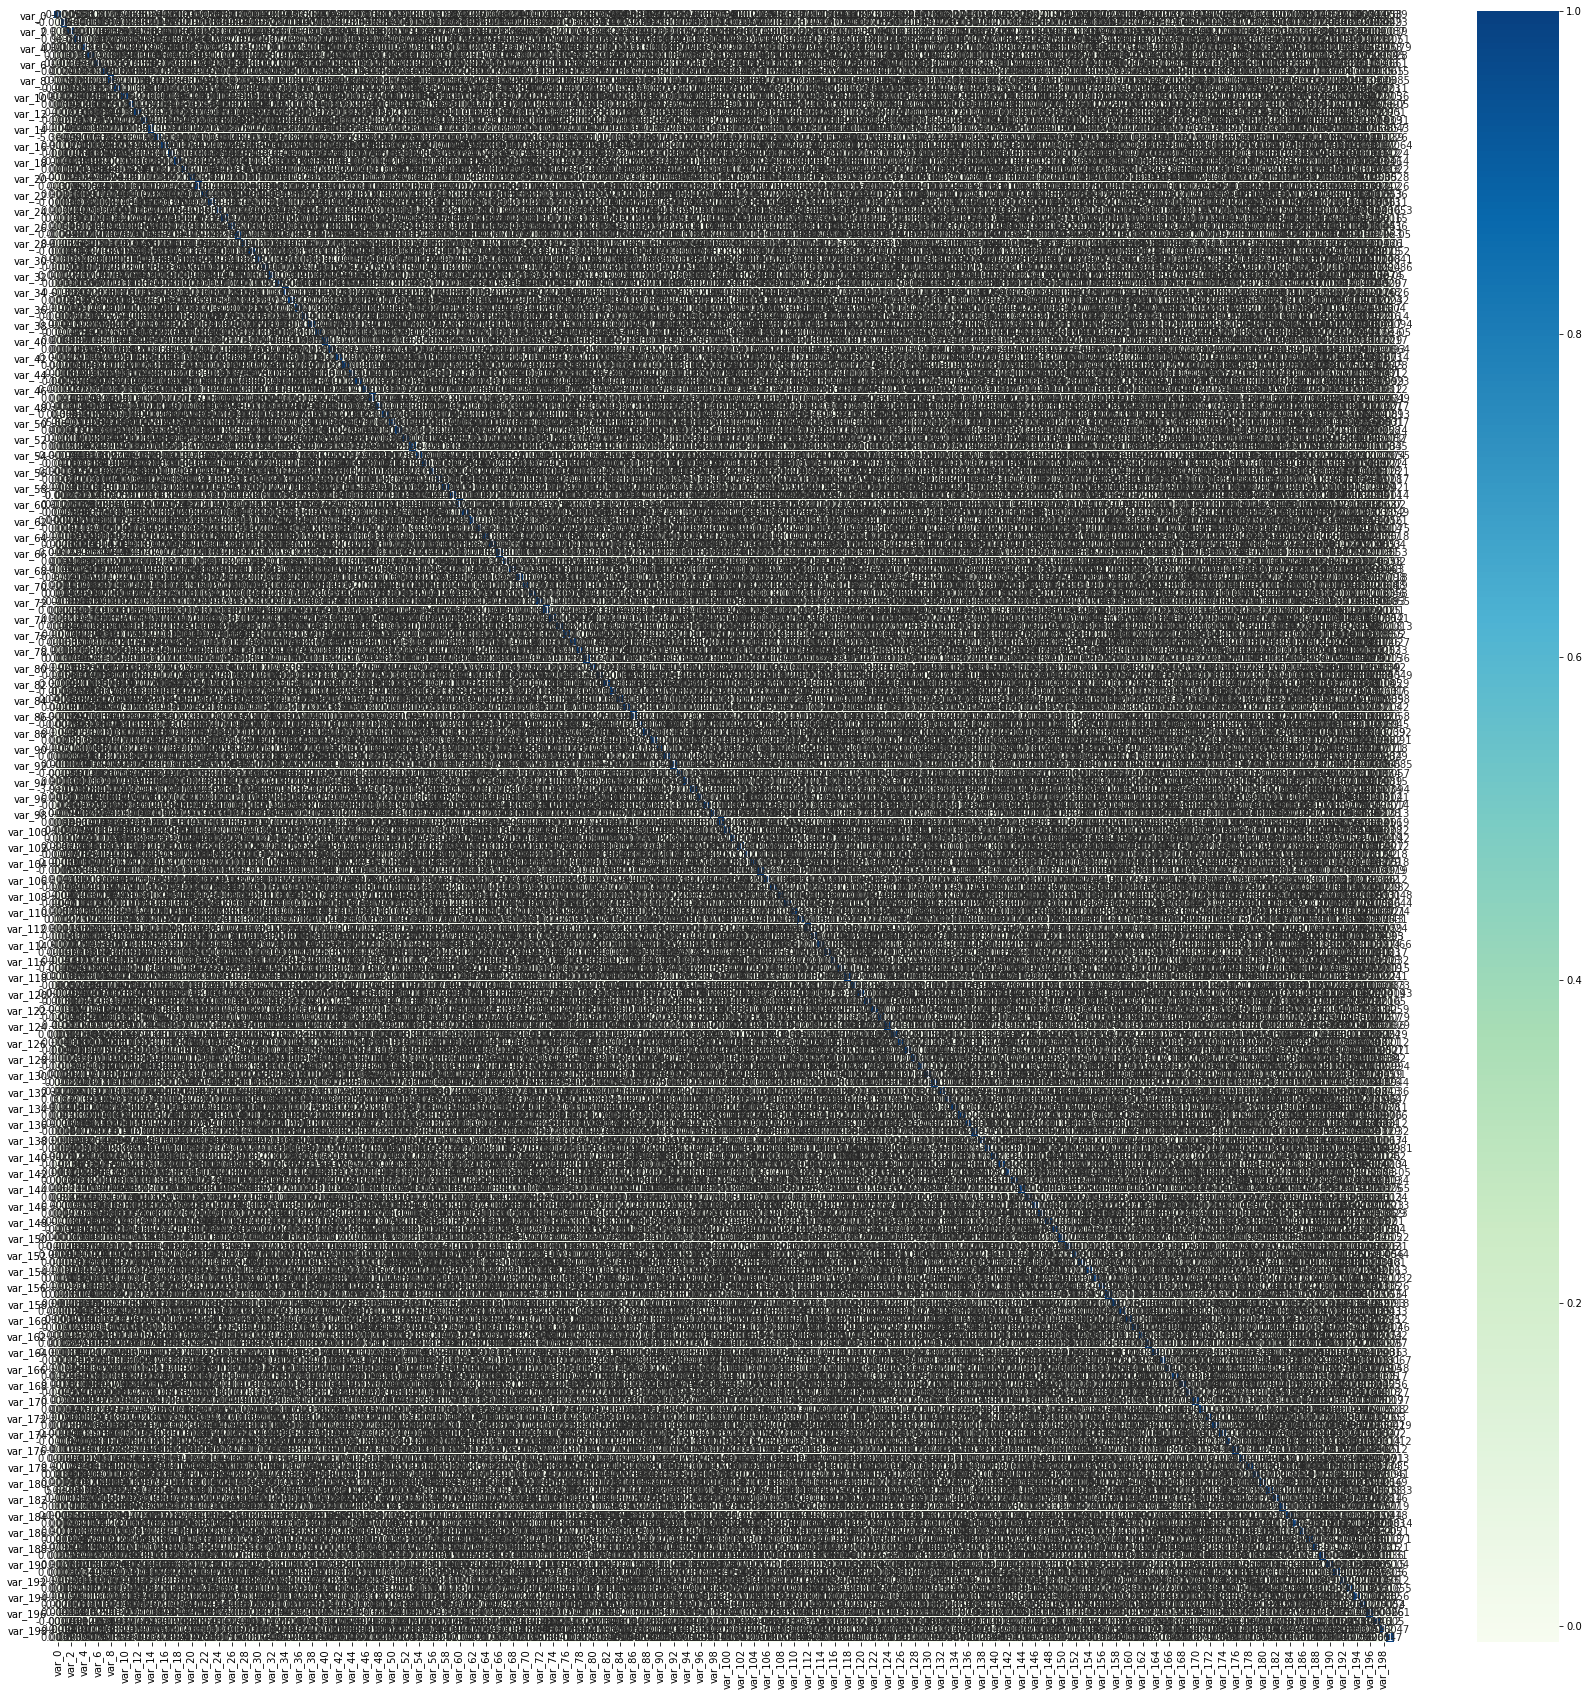

In [ ]:
plt.figure(figsize=(70,70))
sns.heatmap(correlation, cmap = "GnBu", annot = True)
plt.show()

In [25]:
newDataset['target']

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: category
Categories (2, int64): [0, 1]

In [26]:
#Pearson correlation between target and the others variables
#newDataset[newDataset.columns[:]].corr()['target'][:].sort_values(ascending=False)
corrTarget = newDataset.corrwith(newDataset["target"])
corrTarget = corrTarget.sort_values(ascending=False)
for var,cor in corrTarget.items():
    print(f"{var}: {cor} ")

var_6: 0.06672946371388028 
var_110: 0.0642749187648835 
var_53: 0.06339570178440322 
var_26: 0.06242160921785185 
var_22: 0.060559875344326594 
var_99: 0.05836758482648559 
var_190: 0.05597360130159418 
var_2: 0.055871387336379696 
var_133: 0.05455335591010982 
var_0: 0.05238931047320907 
var_1: 0.05034208813824014 
var_179: 0.05000252511501134 
var_40: 0.049530061909099005 
var_184: 0.04831503988612615 
var_78: 0.04824271042776152 
var_170: 0.04797312417072697 
var_191: 0.04711386547027391 
var_94: 0.046294738367297486 
var_67: 0.044672325559616345 
var_18: 0.04347972715943328 
var_173: 0.042022546591069514 
var_164: 0.040997432279475395 
var_118: 0.04035719154697523 
var_147: 0.04027934570717267 
var_91: 0.040107987674965165 
var_89: 0.03936820867156809 
var_95: 0.03853064083954722 
var_155: 0.03723878180204695 
var_35: 0.03656696440530922 
var_71: 0.03360800821873245 
var_106: 0.032940899636760584 
var_162: 0.032644710187625534 
var_157: 0.03264289768455686 
var_48: 0.0323329350648

**Conclusión:** Las variables del dataset no están muy relacionadas con la variable objetivo

# Outliers

In [28]:
from scipy.stats import zscore

In [29]:
newDataset['target'] = newDataset['target'].astype('int8')

In [30]:
scoreDataset = newDataset.copy()

In [31]:
scoreDataset = scoreDataset.drop(['ID_code'], axis=1)

In [32]:
z_scores = zscore(scoreDataset)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [33]:
z_scores

array([[-0.3342, -0.    , -0.    , ..., -0.    , -0.    ,  0.    ],
       [-0.3342,  0.    , -0.    , ..., -0.    ,  0.    ,  0.    ],
       [-0.3342, -0.    , -0.    , ..., -0.    , -0.    ,  0.    ],
       ...,
       [-0.3342,  0.    , -0.    , ..., -0.    , -0.    ,  0.    ],
       [-0.3342, -0.    , -0.    , ...,  0.    , -0.    , -0.    ],
       [-0.3342,  0.    , -0.    , ..., -0.    , -0.    ,  0.    ]],
      dtype=float16)

In [34]:
type(z_scores)

numpy.ndarray

In [35]:
abs_z_scores = np.abs(z_scores)

In [36]:
abs_z_scores

array([[0.3342, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.3342, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.3342, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.3342, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.3342, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.3342, 0.    , 0.    , ..., 0.    , 0.    , 0.    ]],
      dtype=float16)

In [37]:
filtered_entries = (abs_z_scores < 3).all(axis=1)

In [38]:
filtered_entries

array([ True,  True,  True, ...,  True,  True,  True])

In [39]:
datasetV3 = scoreDataset[filtered_entries]

In [40]:
datasetV3.shape

(200000, 201)

In [ ]:
boxPlot(datasetV3)